In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%autoreload 2

In [19]:
def imshow(image: np.array, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.show()

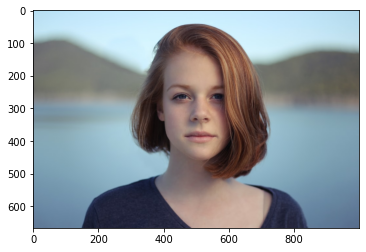

In [26]:
# load the image
image = cv2.imread('../data/images/test.jpg')

#convert to rgb
imshow(image[:,:,::-1])

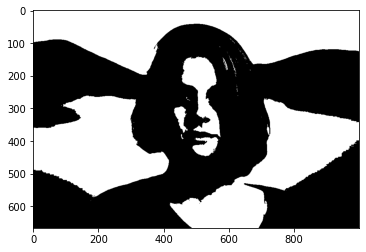

In [43]:
# import your func
from modules.thresholding import threshHandler

imshow(threshHandler(image, {'threshold_value': 150}), cmap='gray')